# Census Income

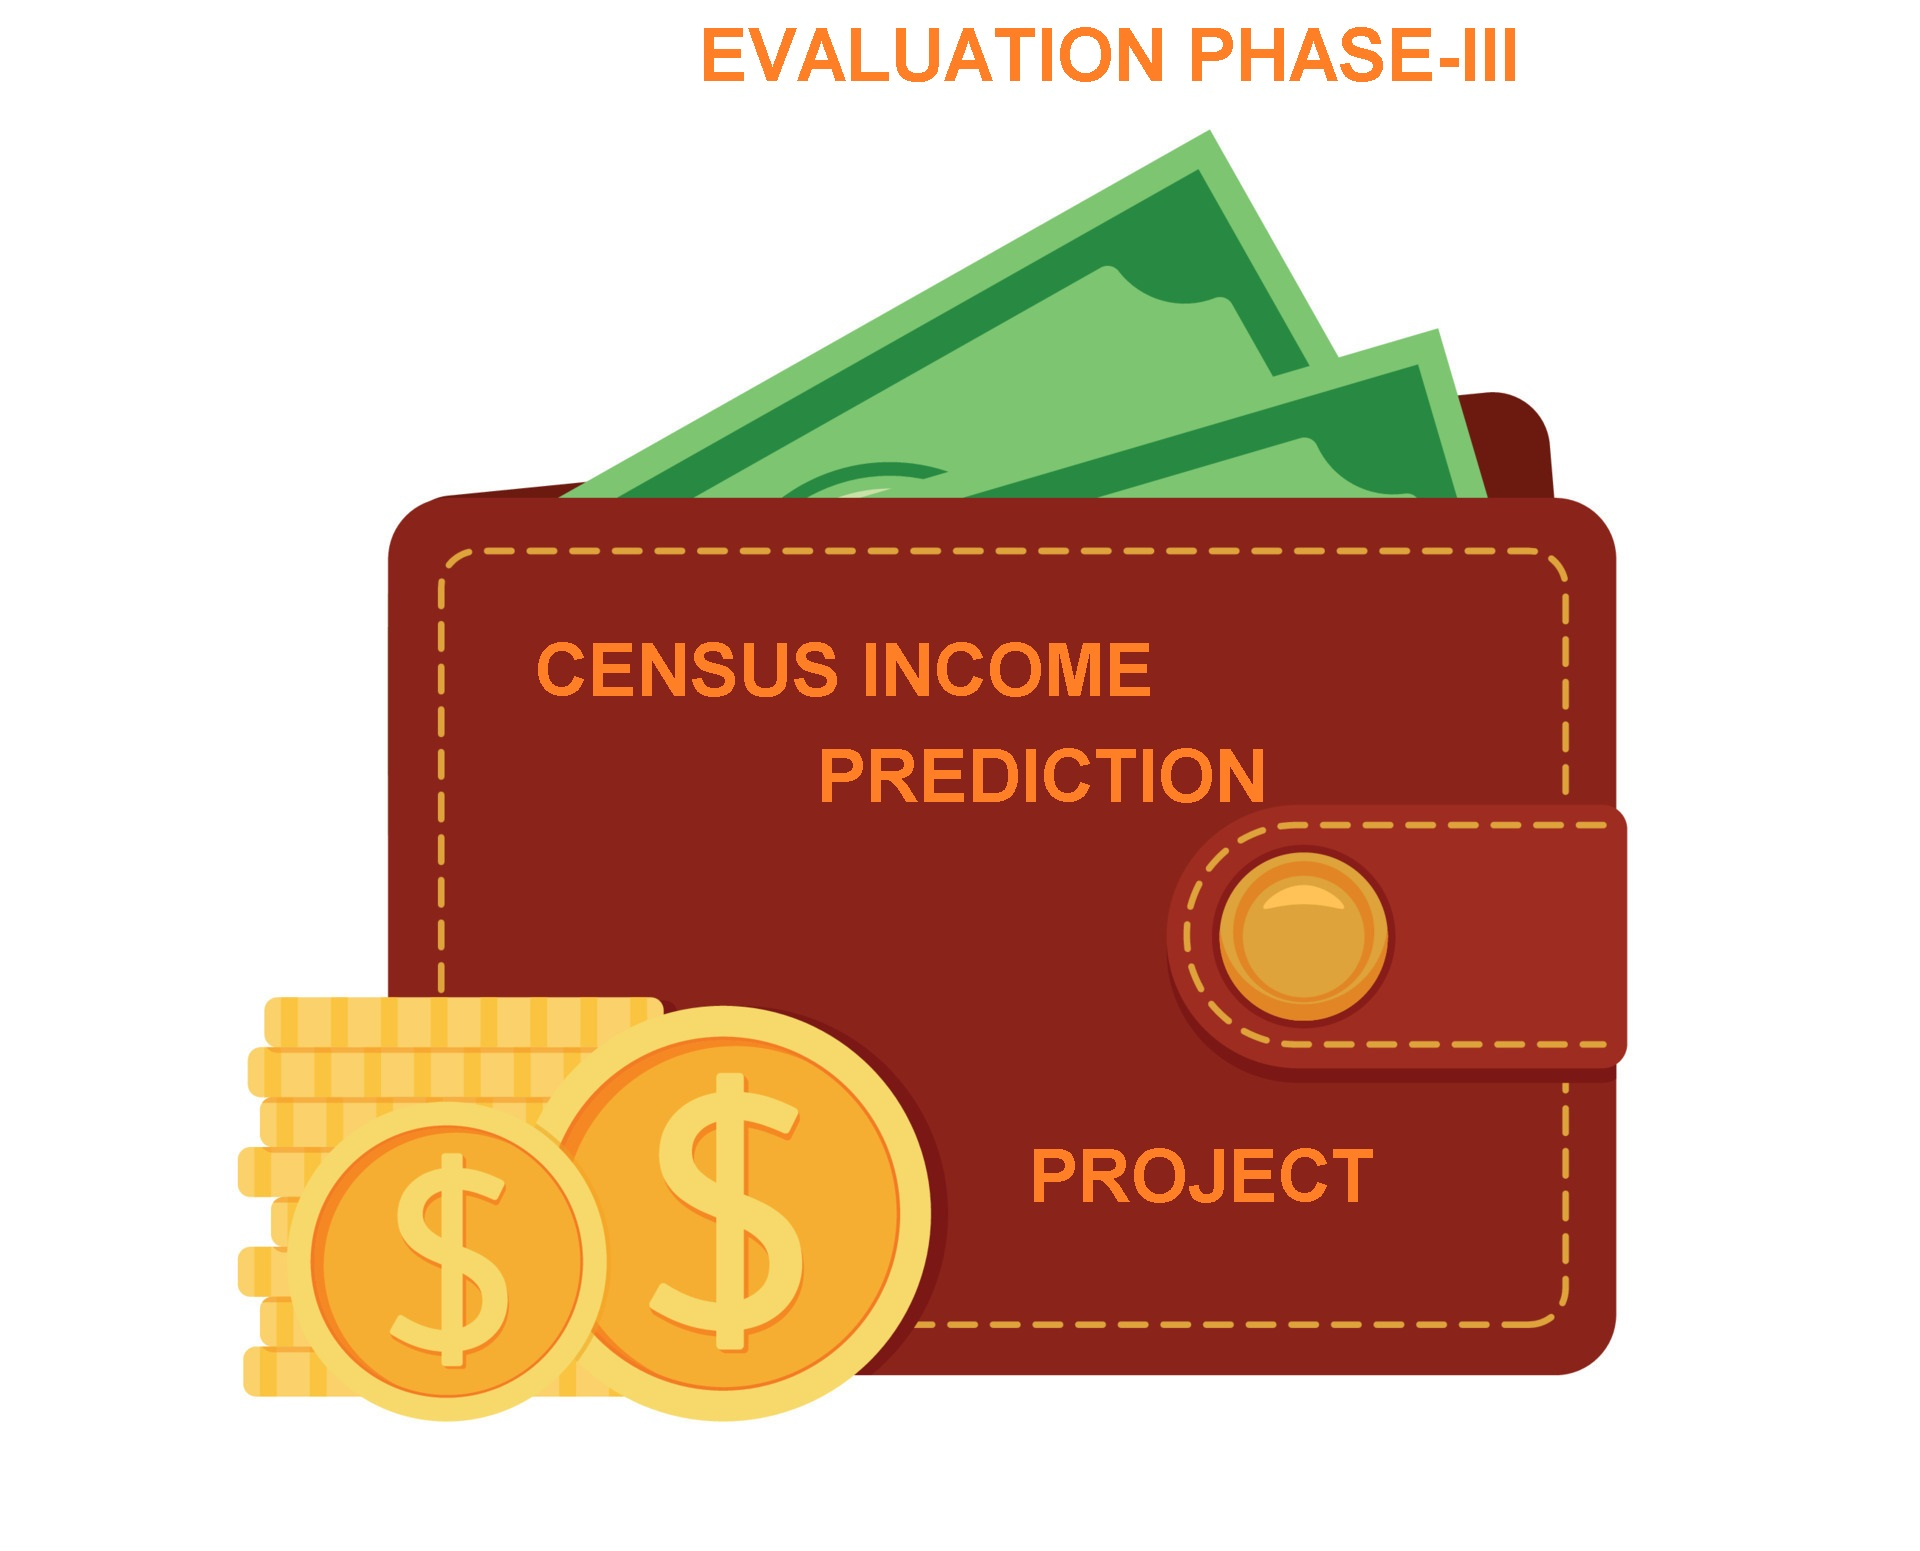

## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)

## Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Uploading data set 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')


## Checking first five rows in our data set

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Checking last five rows in our data set

In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Checking the shape of our data set

In [5]:
df.shape

(32560, 15)

In [6]:
(print("This is shape of our data set",df.shape))

This is shape of our data set (32560, 15)


## Checking info about our data set(Memory Used and data type information)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Our dataset has 15 columns, in which we have 6 integers and 9 objects.

## Checking duplicate values in our data set.

In [8]:
df.duplicated().sum()

24

Our data set has 24 duplicate values, lets remove it from our data set

## Lets drop the duplicate rows from our data set.

In [9]:
df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Checking Missing Values in our data set.

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Our data set has no null values.

## Checking for blank value in our Target Column

In [11]:
df[df['Income'] == ''].index

Int64Index([], dtype='int64')

No blank valuse in our data set

## Checking the unique values in our data set

In [12]:
df.nunique().sort_values(ascending=0)

Fnlwgt            21647
Capital_gain        119
Hours_per_week       94
Capital_loss         92
Age                  73
Native_country       42
Education            16
Education_num        16
Occupation           15
Workclass             9
Marital_status        7
Relationship          6
Race                  5
Sex                   2
Income                2
dtype: int64

In [13]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [14]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
df['Fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [16]:
df['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [17]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [18]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [19]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [20]:
df['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

In [21]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [22]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [23]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [24]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [25]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [26]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

###### WE ? in our 'Native_country'.It has 583 values. It should be consider as missing value.

In [27]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [28]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [29]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [30]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [31]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [32]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [33]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [34]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

###### In Occupation column also we "?". It has 1843 values.

In [35]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [36]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

###### In workclass column also has the "?".It has 1836 values

In [37]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [38]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [39]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [40]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

### We can observe that the columns Workclass,Occupation and Native_country having ? values.

As we have "?"value, lets handle as missing value in our data set.

In [41]:

df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

As it is a categorical values, we used the mode method to fill the values.

## Descriptive Statistics

In [3]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.describe(include=object).T

,count,unique,top,freq
Workclass,32560,9,Private,22696
Education,32560,16,HS-grad,10501
Marital_status,32560,7,Married-civ-spouse,14976
Occupation,32560,15,Prof-specialty,4140
Relationship,32560,6,Husband,13193
Race,32560,5,White,27815
Sex,32560,2,Male,21789
Native_country,32560,42,United-States,29169
Income,32560,2,<=50K,24719


In [43]:
#we will replace 0 in Capital_gain column with mean of this column
df["Capital_gain"].replace(0, df["Capital_gain"].mean(),inplace = True)

As we have almost 95% zero value in our dataset. We dropping this column.

In [44]:
df.drop(columns="Capital_loss",inplace=True)

# Data Visualization

In [45]:
# grouping categorical columns
cat_cols = [x for x in df.columns if df[x].dtypes=='O']
# grouping numerical columns
num_cols = [y for y in df.columns if df[y].dtypes!='O']

## Univariate Analysis

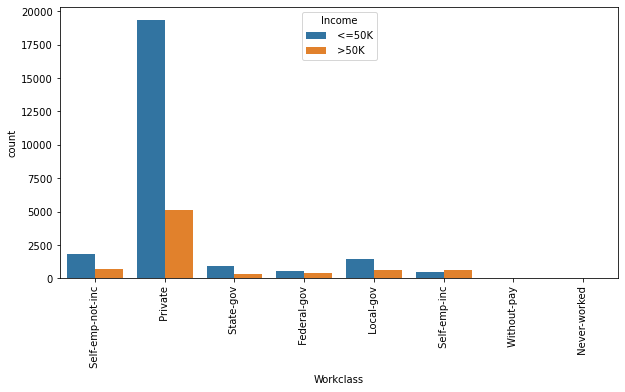

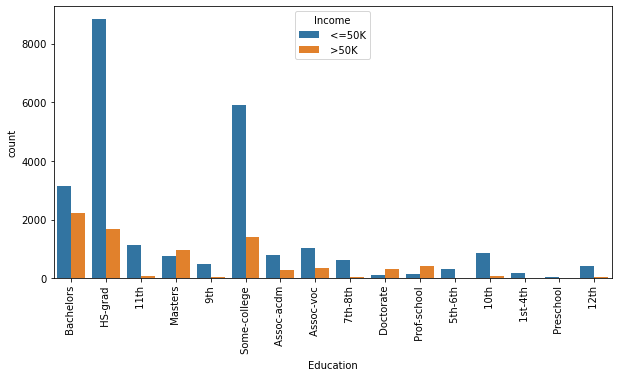

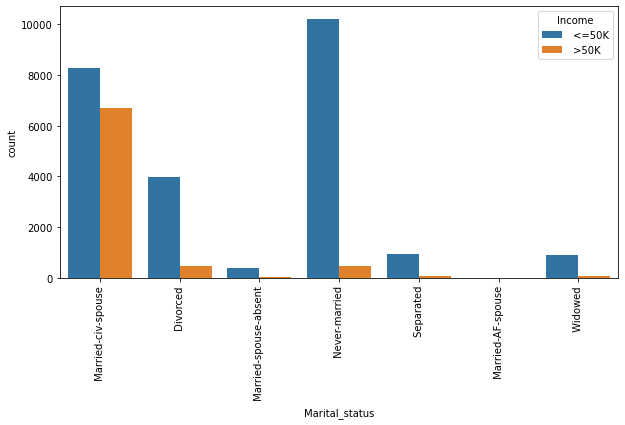

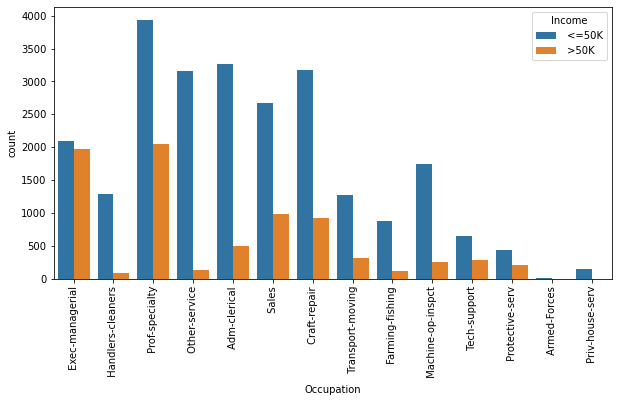

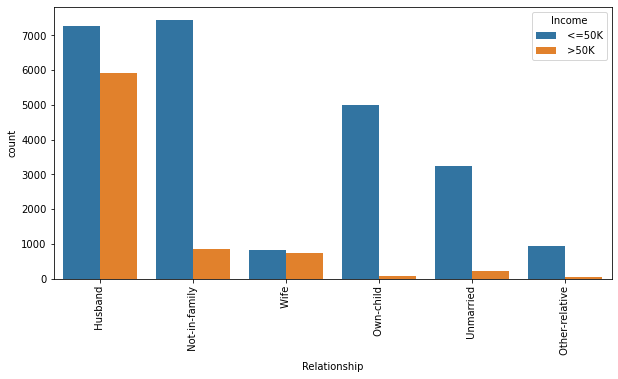

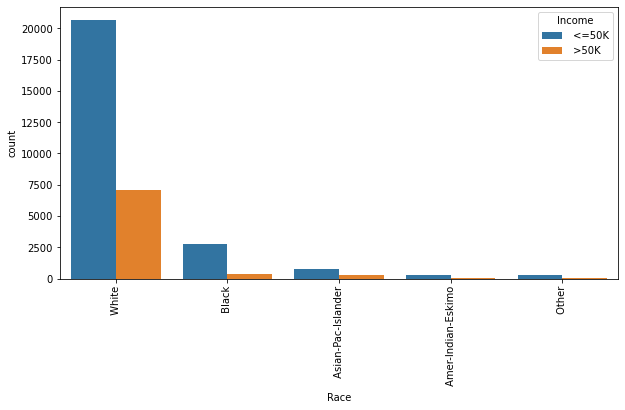

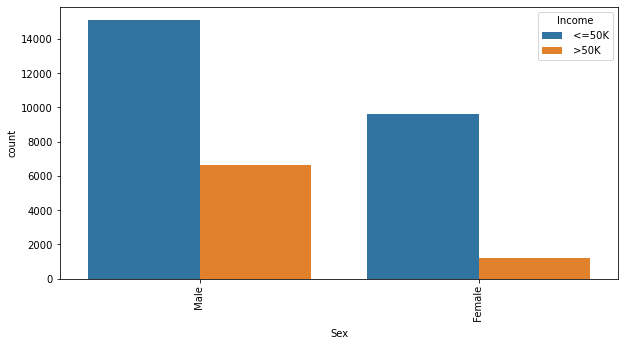

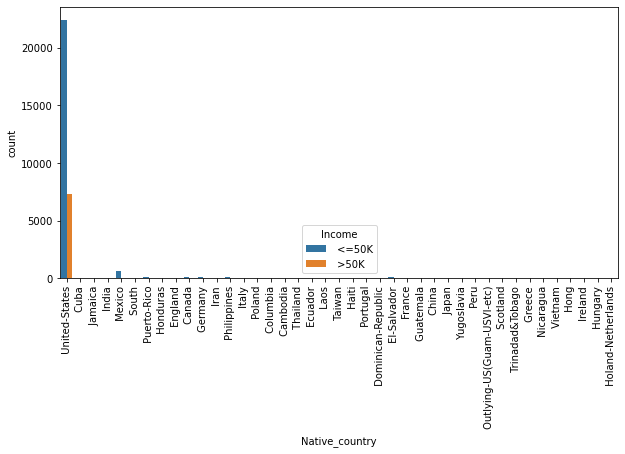

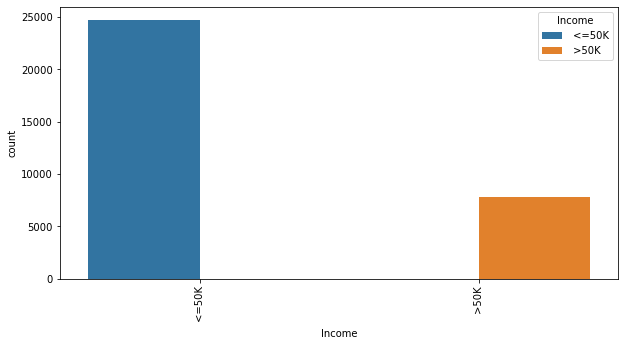

In [46]:
# plotting count of the individual features

for i in df[cat_cols]:
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x=i,data=df,hue='Income')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

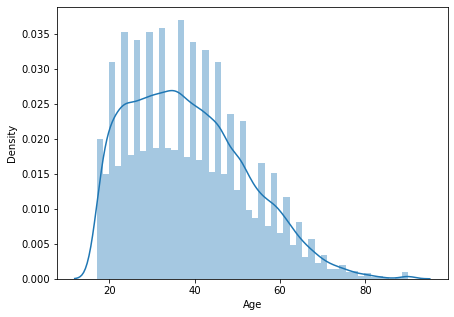

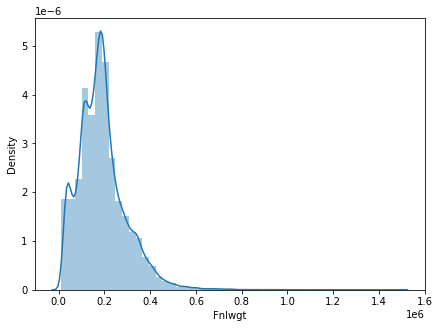

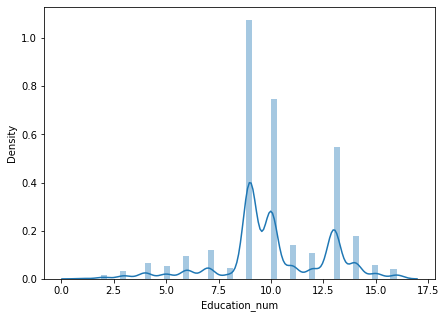

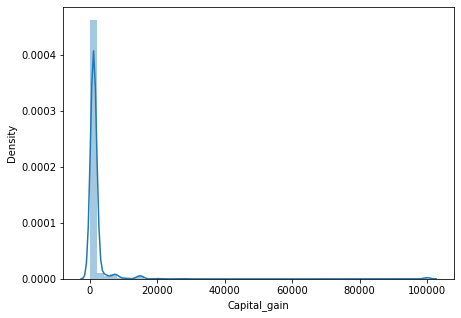

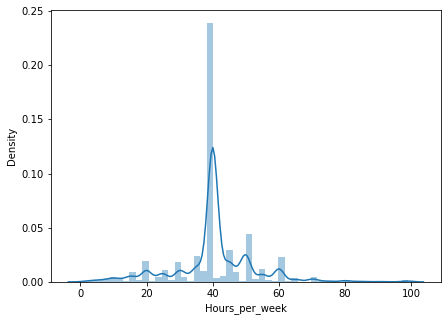

In [47]:
# plotting distplot to check the distributions of each numerical category feature

for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,kde=True)
    plt.show()

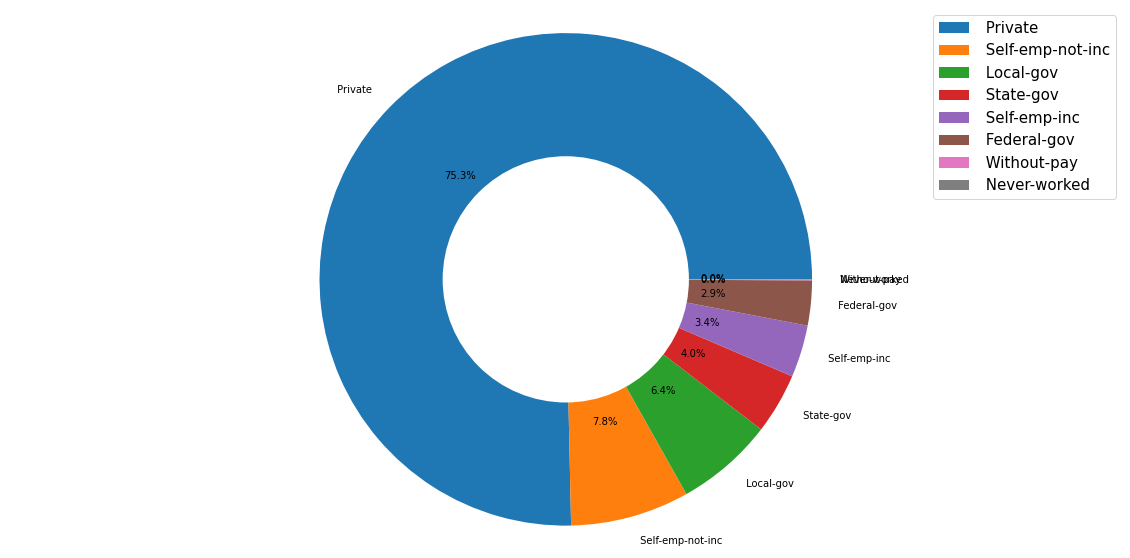

In [48]:
#Lets have a look on Workclass, how it is distributed
plt.figure(figsize=(20, 10))
plt.pie( df["Workclass"].value_counts().values, labels = df["Workclass"].value_counts().index, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

###### Most of the working population comes under "Private Sector".Almost 75% of the total population.

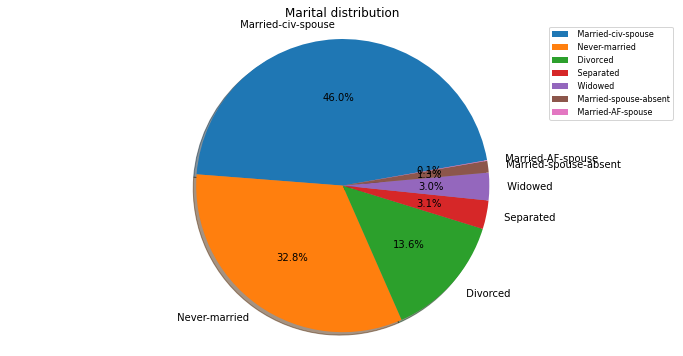

In [49]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(marital.values, labels = marital.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 8})
plt.axis('equal')
plt.show()

###### Mostly population is marrierd civ spouse category.

## Multivariate Analysis

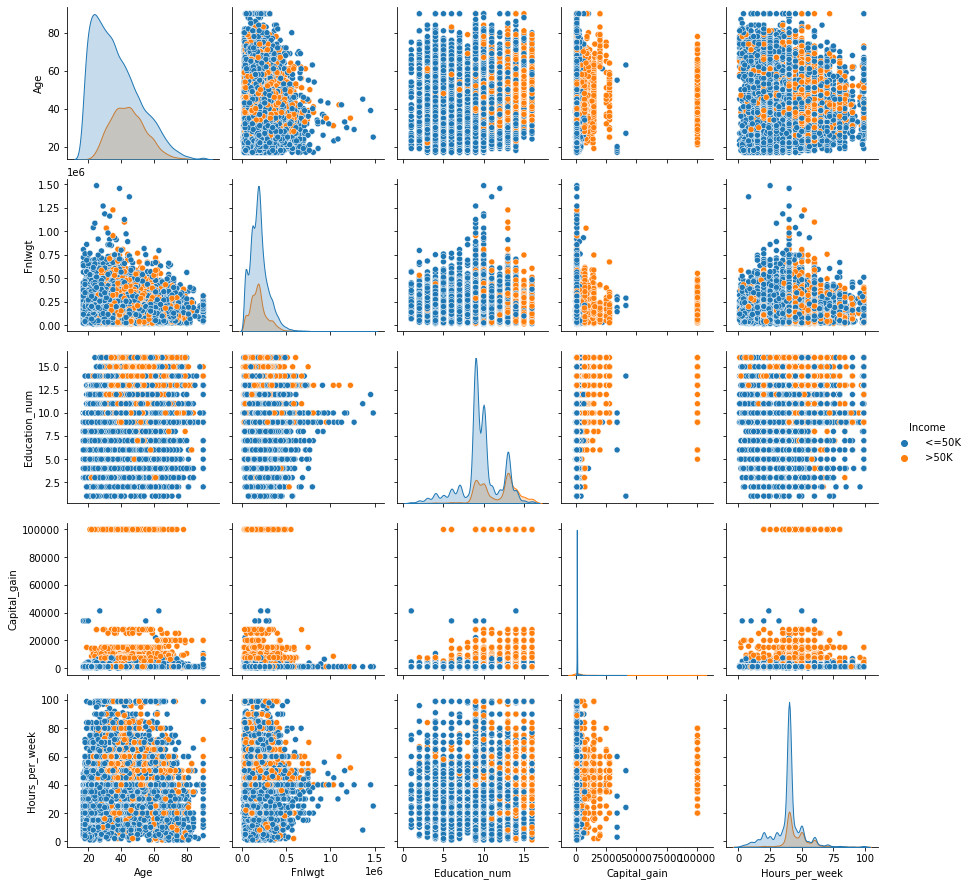

In [50]:
# plotting pairplot to check the relationship with multiple bivariate features
sns.pairplot(df,hue='Income')
plt.show()

# Preprocessiong Pipeline

In [51]:
#lets replace Target column(Income) into binary codes to visualize heatmap

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

# HeatMap to check correlation

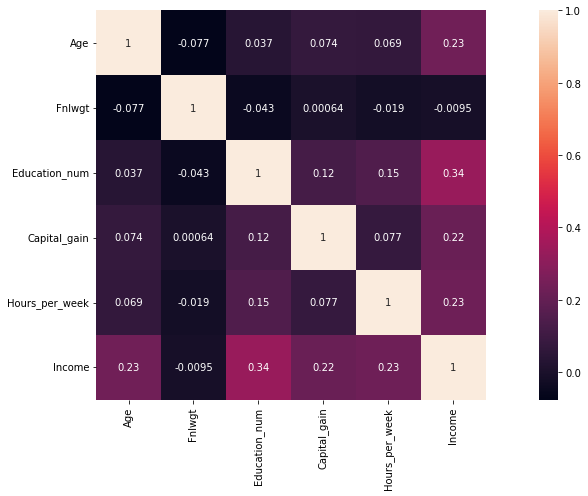

In [52]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (15,7))
sns.heatmap(df_corr, annot=True, square=True)
plt.tight_layout()

## Split the data into label and features

In [53]:
#First divide our data into label and features

x = df.drop(columns = "Income")
y = df["Income"]

## Label Encoder

In [54]:
#lets convert categorical data into numeric values, using label encoder
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

## Outlier Detection

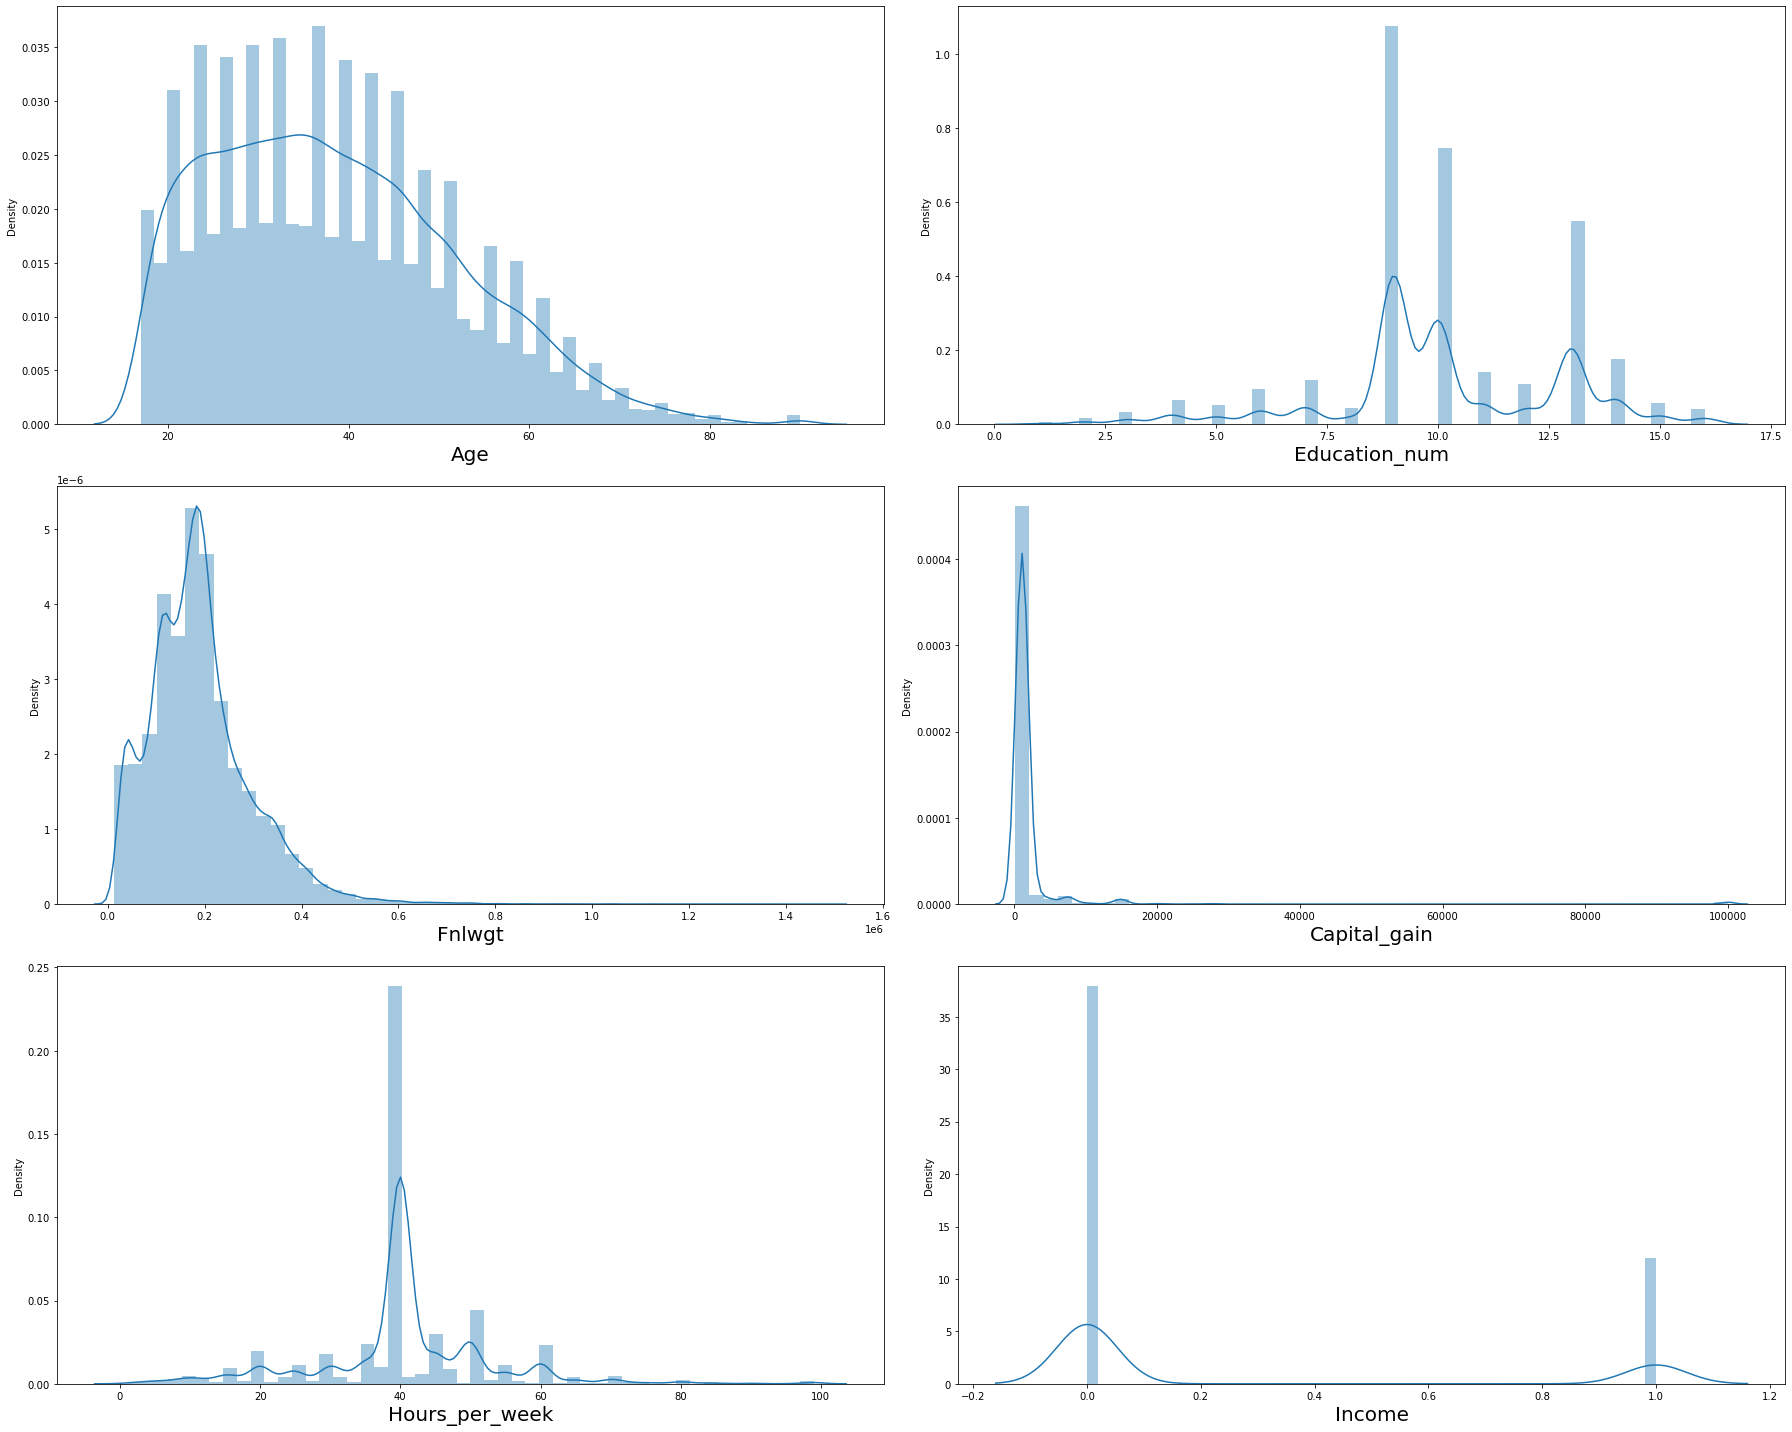

In [55]:
# check for outliers
#Visualizing how data is distributed
plt.figure(figsize = (25,20))
plotnumber = 1
columns = ["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week","Income"]
for column in df[columns]:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

###### Outliers are presents in dataset.

## Z-score method

In [59]:
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Age','Education_num','Fnlwgt','Capital_gain','Hours_per_week']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
new_df = df[filtering_entry]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,1077.615172,40,United-States,0
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,40,United-States,0


In [60]:
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before         : (30219, 14)
shape after          : (29185, 14)
Percentage Loss      : 0.03421688341771733


## Skewness

In [61]:
#First divide our data into label and features

x = df.drop(columns = "Income")
y = df["Income"]

In [62]:
#lets check skewness 
x.skew()

Age               0.471422
Fnlwgt            0.547130
Education_num    -0.166868
Capital_gain      5.173719
Hours_per_week   -0.312626
dtype: float64

<Figure size 2160x2160 with 0 Axes>

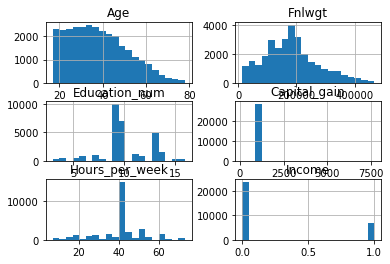

In [66]:
# find skewness by plotting histplot

plt.figure(figsize=(30,30))
df.hist(bins=20)
plt.show()

### Removing skewness


### Apply yeo-johnson Power transformation to remove skewness

In [67]:

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

x['Age'] = scaler.fit_transform(x['Age'].values.reshape(-1,1))
x['Fnlwgt'] = scaler.fit_transform(x['Fnlwgt'].values.reshape(-1,1))
x['Education_num'] = scaler.fit_transform(x['Education_num'].values.reshape(-1,1))
x['Capital_gain'] = scaler.fit_transform(x['Capital_gain'].values.reshape(-1,1))
x['Hours_per_week'] = scaler.fit_transform(x['Hours_per_week'].values.reshape(-1,1))

In [68]:
x.skew()

Age              -0.018974
Fnlwgt           -0.044720
Education_num     0.024461
Capital_gain      0.000000
Hours_per_week    0.101658
dtype: float64

###### Skewness is removed.

## lets convert categorical data into numeric values, using label encoder

In [69]:
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

###### Lets check the table count

In [70]:
y.value_counts()

0    23480
1     6739
Name: Income, dtype: int64

##### The value count of our target variable is imbalanced, we will now oversample it by using smote.

## SMOTE

# Lets do oversampling using SMOTE

In [71]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(x,y)

In [72]:
x_over

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.941339,5,-1.116854,8,1.212321,2,3,0,4,1,0.0,-2.301685,38
1,0.132456,3,0.441787,10,-0.466306,0,5,1,4,1,0.0,-0.047823,38
2,1.119241,3,0.626769,1,-1.252855,2,5,0,2,1,0.0,-0.047823,38
3,-0.712895,3,1.537695,8,1.212321,2,9,5,2,0,0.0,-0.047823,4
4,0.056364,3,1.082377,11,1.650766,2,3,5,4,0,0.0,-0.047823,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46955,0.934245,3,-0.710066,8,1.212321,2,3,0,4,1,0.0,1.979453,38
46956,0.567106,3,-0.502020,10,-0.466306,2,3,5,4,0,0.0,-0.047823,38
46957,0.272743,1,-0.058394,11,1.650766,2,9,0,4,1,0.0,-0.133544,38
46958,0.513412,3,-0.534723,2,-2.611449,2,6,5,1,0,0.0,-0.047823,38


# Data Standardization

###### Lets seperate numerical data

In [73]:
num_data = pd.DataFrame(x_over,columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'])

###### Lets bring all numerical features to common scale by applying standard scaler

In [77]:
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns=num_data.columns)


In [78]:
cat_data = x_over.drop(columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'] )

###### Lets join both categorical data and numerical data of our features


In [80]:
X=x_num.join(cat_data)
X


,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,0.840568,-1.157720,0.971156,0.0,-2.570180,5,8,2,3,0,4,1,38
1,-0.045833,0.465261,-0.659836,0.0,-0.203583,3,10,0,5,1,4,1,38
2,1.035518,0.657879,-1.424065,0.0,-0.203583,3,1,2,5,0,2,1,38
3,-0.972196,1.606408,0.971156,0.0,-0.203583,3,8,2,9,5,2,0,4
4,-0.129217,1.132294,1.397158,0.0,-0.203583,3,11,2,3,5,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46955,0.832795,-0.734140,0.971156,0.0,1.925093,3,8,2,3,0,4,1,38
46956,0.430471,-0.517506,-0.659836,0.0,-0.203583,3,10,2,3,5,4,0,38
46957,0.107898,-0.055568,1.397158,0.0,-0.293592,1,11,2,9,0,4,1,38
46958,0.371631,-0.551559,-2.744105,0.0,-0.203583,3,2,2,6,5,1,0,38


# Building Machine Learning Model

## Lets find the best random state using LogisticRegression

In [81]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7563884156729132 on Random State 92


###### Lets split our data into train and test parts with best random_state

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X, y_over, test_size = 0.25, random_state = max_rs )

## LogisticRegression

###### Lets check the model with LogisticRegression

In [83]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

Accuracy Score: 75.63884156729131%
roc_auc_score: 75.6382981532958%
---------------------------------------------------
Confusion Matrix : 
 [[4252 1617]
 [1243 4628]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75      5869
           1       0.74      0.79      0.76      5871

    accuracy                           0.76     11740
   macro avg       0.76      0.76      0.76     11740
weighted avg       0.76      0.76      0.76     11740



## DecisionTreeClassifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 83.7649063032368%
roc_auc_score: 83.76474331018586%
---------------------------------------------------
Confusion Matrix : 
 [[4860 1009]
 [ 897 4974]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      5869
           1       0.83      0.85      0.84      5871

    accuracy                           0.84     11740
   macro avg       0.84      0.84      0.84     11740
weighted avg       0.84      0.84      0.84     11740



## RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 88.015332197615%
roc_auc_score: 88.01487475701165%
---------------------------------------------------
Confusion Matrix : 
 [[5008  861]
 [ 546 5325]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      5869
           1       0.86      0.91      0.88      5871

    accuracy                           0.88     11740
   macro avg       0.88      0.88      0.88     11740
weighted avg       0.88      0.88      0.88     11740



## KNeighborsClassifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_kn)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

Accuracy Score: 85.29812606473595%
roc_auc_score: 85.29674710425914%
---------------------------------------------------
Confusion Matrix : 
 [[4531 1338]
 [ 388 5483]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      5869
           1       0.80      0.93      0.86      5871

    accuracy                           0.85     11740
   macro avg       0.86      0.85      0.85     11740
weighted avg       0.86      0.85      0.85     11740



## XGBClassifier model

###### lets check with XGBClassifier model

In [93]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print("------------------------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

------------------------------------------------------------------------
Accuracy Score: 88.85860306643953%
roc_auc_score: 88.85851857998016%
--------------------------------------------------------
Confusion Matrix : 
 [[5186  683]
 [ 625 5246]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      5869
           1       0.88      0.89      0.89      5871

    accuracy                           0.89     11740
   macro avg       0.89      0.89      0.89     11740
weighted avg       0.89      0.89      0.89     11740



## Cross-Validation

###### Let's check cross validation score for all algorithms
for LogisticRegression

In [94]:
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),XGBClassifier()]
for i in model:
    scores = cross_val_score(i, X, y_over, cv = 5,scoring = "accuracy" )
    print("Cross validation score of", i ,"is:", scores.mean())

Cross validation score of LogisticRegression() is: 0.7480834752981261
Cross validation score of DecisionTreeClassifier() is: 0.8270442930153322
Cross validation score of RandomForestClassifier() is: 0.8836030664395229
Cross validation score of KNeighborsClassifier() is: 0.8537691652470187
Cross validation score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parall

###### From above observations we can say the RandomForestClassifier is giving least difference. Let's proceed with Hyperparameter.

# ROC & AUC Curve

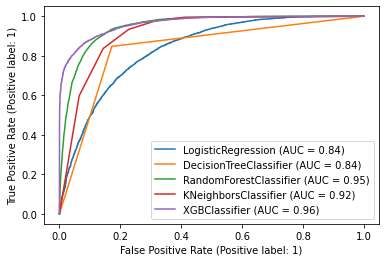

In [95]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

## RandomForestClassifier and XGBclassifier offer good performance compared to other algorithms, based on the cross-validation score and observing the performance of the model we will select RandomForestClassifier as the most suitable algorithm since the random forest has a smaller difference than xgbclassifier.

# Hyperparameter Tuning

In [96]:
#lets selects different parameters for tuning
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [99]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [100]:
# printing the best parameters
GCV.best_params_  

{'criterion': 'gini',
 'max_depth': 22,
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [101]:
#Let's train and test our model using best parameters
model = RandomForestClassifier( criterion = 'gini', max_depth=20, n_estimators=1100, min_samples_leaf = 1)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")

Accuracy Score: 87.6405451448041%
---------------------------------------------------
roc_auc_score: 88.01487475701165%
---------------------------------------------------
Confusion Matrix : 
 [[4823 1046]
 [ 405 5466]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      5869
           1       0.84      0.93      0.88      5871

    accuracy                           0.88     11740
   macro avg       0.88      0.88      0.88     11740
weighted avg       0.88      0.88      0.88     11740

---------------------------------------------------


## ROC curve for final model

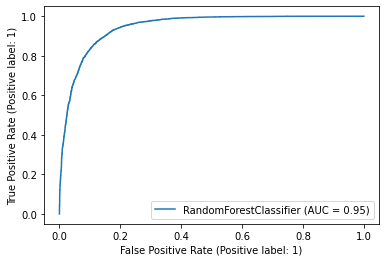

In [102]:
#Lets check our model performance after hyperparameter tuning by plottin 
plot_roc_curve(model, x_test, y_test)
plt.show()

### Great, we've improved the model's accuracy score as well as performance (AUC) by adjusting hyperparameters.

# Save the model

In [103]:
import joblib
joblib.dump(model,"Census_Income_prediction.pkl")

['Census_Income_prediction.pkl']

# Load the model

In [104]:
Model = joblib.load("Census_Income_prediction.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
11735,0,1
11736,0,0
11737,0,1
11738,0,1


## 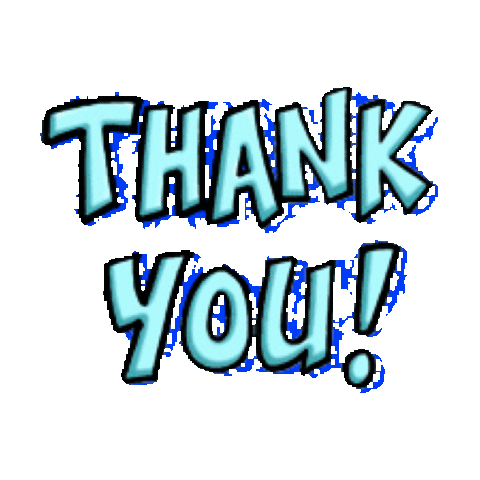